In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,mean_squared_error,root_mean_squared_error,mean_absolute_error,accuracy_score

# 1- Data Loading and cleaning

In [ ]:
data = pd.read_csv("Clean_Dataset.csv")
data.drop(columns=['Unnamed: 0'], inplace=True)  
data.head(10) 

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
5,Vistara,UK-945,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.33,1,5955
6,Vistara,UK-927,Delhi,Morning,zero,Morning,Mumbai,Economy,2.08,1,6060
7,Vistara,UK-951,Delhi,Afternoon,zero,Evening,Mumbai,Economy,2.17,1,6060
8,GO_FIRST,G8-334,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.17,1,5954
9,GO_FIRST,G8-336,Delhi,Afternoon,zero,Evening,Mumbai,Economy,2.25,1,5954


# 2- Data Wrangling and Transformation

In [ ]:
data.isnull().sum()

airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

In [ ]:
data.duplicated().sum()

np.int64(0)

In [ ]:
data.drop('flight', axis=1, inplace=True) 

In [ ]:
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   source_city       300153 non-null  object 
 2   departure_time    300153 non-null  object 
 3   stops             300153 non-null  object 
 4   arrival_time      300153 non-null  object 
 5   destination_city  300153 non-null  object 
 6   class             300153 non-null  object 
 7   duration          300153 non-null  float64
 8   days_left         300153 non-null  int64  
 9   price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 22.9+ MB


In [ ]:
data.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
duration,300153.0,12.22,7.19,0.83,6.83,11.25,16.17,49.83
days_left,300153.0,26.00,13.56,1.00,15.00,26.00,38.00,49.00
price,300153.0,20889.66,22697.77,1105.00,4783.00,7425.00,42521.00,123071.00


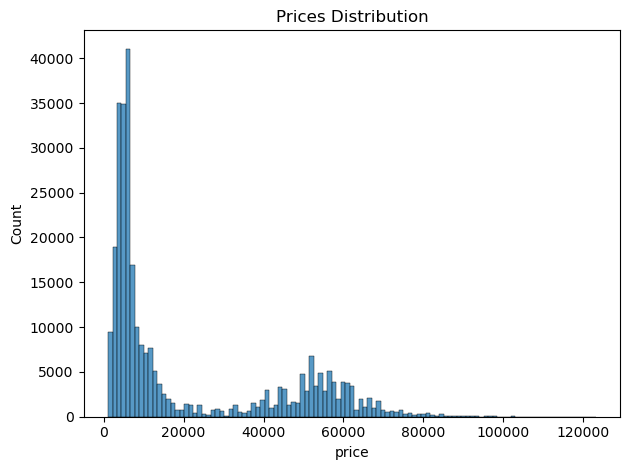

In [ ]:
sns.histplot(data['price'])
plt.title('Prices Distribution')
plt.tight_layout()
plt.show()

In [ ]:
data.head(10)

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
5,Vistara,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.33,1,5955
6,Vistara,Delhi,Morning,zero,Morning,Mumbai,Economy,2.08,1,6060
7,Vistara,Delhi,Afternoon,zero,Evening,Mumbai,Economy,2.17,1,6060
8,GO_FIRST,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.17,1,5954
9,GO_FIRST,Delhi,Afternoon,zero,Evening,Mumbai,Economy,2.25,1,5954


In [ ]:
Q1 = data['price'].quantile(0.25)
Q3 = data['price'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.25 * IQR
upper_bound = Q3 + 1.25 * IQR

print("Data before deleting outliers:", len(data))

data = data[(data['price'] >= lower_bound) & (data['price'] <= upper_bound)]


print(f"Q1: {Q1}, Q3: {Q3}, IQR: {IQR}")

print("Data before deleting outliers:", len(data))
print(f"Lower Bound: {lower_bound}, Upper Bound: {upper_bound}")


Data before deleting outliers: 300153
Q1: 4783.0, Q3: 42521.0, IQR: 37738.0
Data before deleting outliers: 299597
Lower Bound: -42389.5, Upper Bound: 89693.5


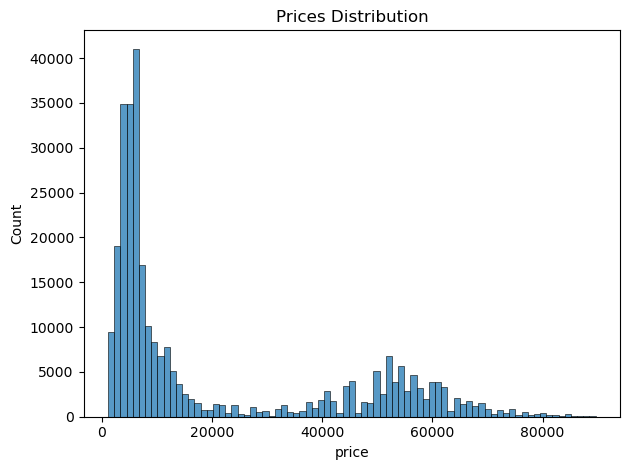

In [ ]:
sns.histplot(data['price'])
plt.title('Prices Distribution')
plt.tight_layout()
plt.show()

# 3- Data analysis and Category visualization

# 3.1 Price Vs Class

In [ ]:
price_vs_class = pd.pivot_table(data, index='class', values='price', 
                        aggfunc=['mean','count']).round(2)
price_vs_class = pd.DataFrame(price_vs_class)
price_vs_class.reset_index(inplace=True)
price_vs_class.columns = ['class', 'mean_price','count'] 
price_vs_class.head(10)

,class,mean_price,count
0,Business,52284.48,92931
1,Economy,6572.34,206666


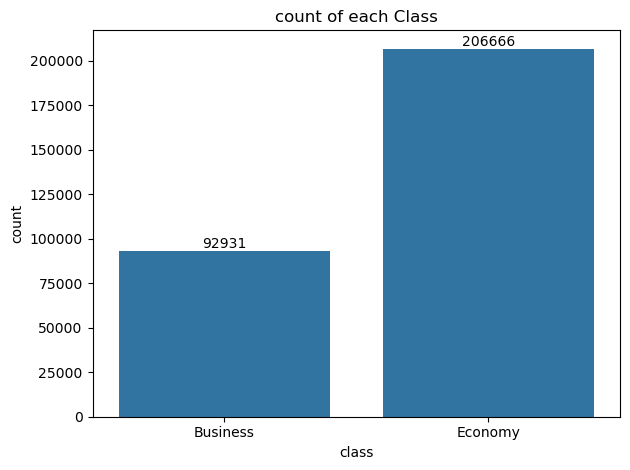

In [ ]:
ax = sns.barplot(x='class', y='count', data=price_vs_class)
plt.title('count of each Class')
ax.bar_label(ax.containers[0])
plt.tight_layout()
plt.show()

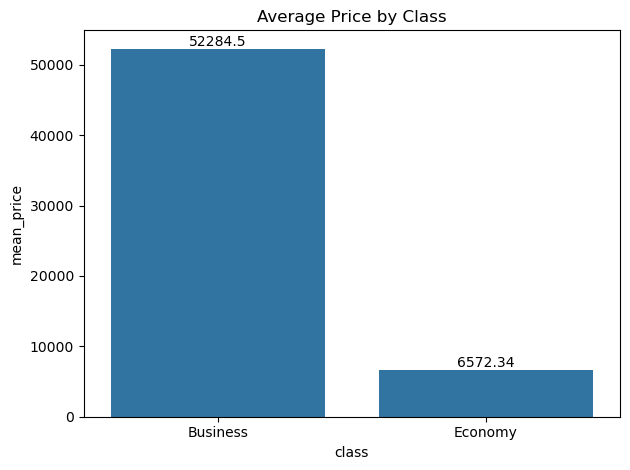

In [ ]:
ax = sns.barplot(x='class', y='mean_price', data=price_vs_class)
plt.title('Average Price by Class')
ax.bar_label(ax.containers[0])
plt.tight_layout()
plt.show()

**1. we found out that the most used class flights is the economy also the mean price is lower in business than the economy class flights**

**2. we have Economy Flights is the hightest = 206666 and Businnes Flights = 92931**


# 3.2 Price Vs Airline

In [ ]:
price_vs_airline = pd.pivot_table(data, index='airline', values='price', 
                        aggfunc=['mean','count']).round(2)
price_vs_airline = pd.DataFrame(price_vs_airline)
price_vs_airline.reset_index(inplace=True) 
price_vs_airline.columns = ['airline', 'mean_price','count'] 
price_vs_airline.head(10)  

,airline,mean_price,count
0,AirAsia,4091.07,16098
1,Air_India,23506.19,80891
2,GO_FIRST,5652.01,23173
3,Indigo,5324.22,43120
4,SpiceJet,6179.28,9011
5,Vistara,30113.71,127304


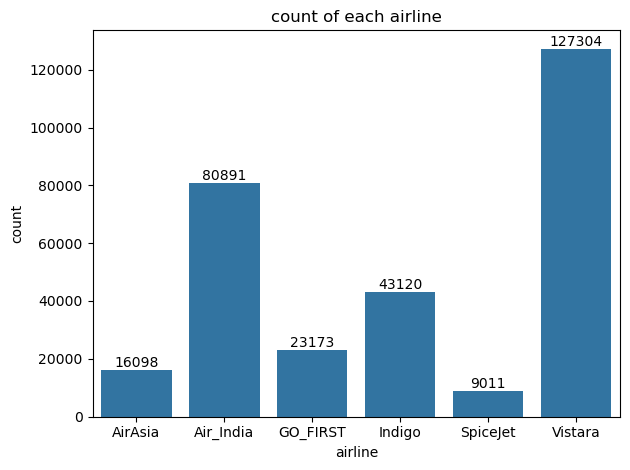

In [ ]:
ax = sns.barplot(x='airline', y='count', data=price_vs_airline)
plt.title('count of each airline')
ax.bar_label(ax.containers[0])
plt.tight_layout()
plt.show()

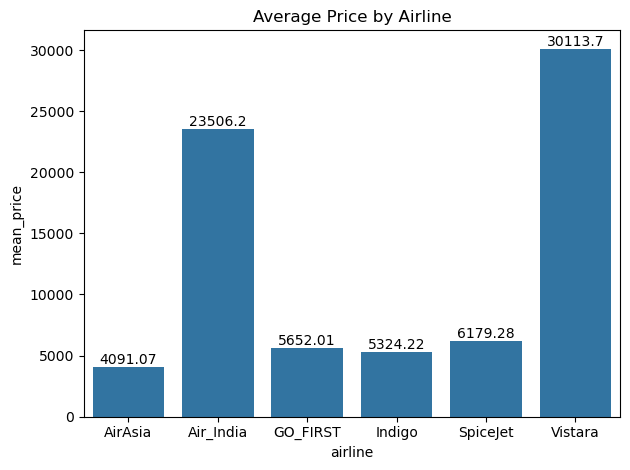

In [ ]:
ax = sns.barplot(x='airline', y='mean_price', data=price_vs_airline)
plt.title('Average Price by Airline')
ax.bar_label(ax.containers[0])
plt.tight_layout()
plt.show()

**1. Vistara Airline has the highest count = 127304 and the hightest mean price = 30113.71**


# 3.3 Price vs Departure Time 

In [ ]:
price_vs_departure_time = pd.pivot_table(data, index='departure_time', values='price', 
                        aggfunc=['mean','count']).round(2)
price_vs_departure_time = pd.DataFrame(price_vs_departure_time)
price_vs_departure_time.reset_index(inplace=True) 
price_vs_departure_time.columns = ['departure_time', 'mean_price','count'] 
price_vs_departure_time.head(10)  

,departure_time,mean_price,count
0,Afternoon,18105.67,47748
1,Early_Morning,20292.48,66721
2,Evening,21070.71,64962
3,Late_Night,9295.30,1306
4,Morning,21409.99,70932
5,Night,22932.22,47928


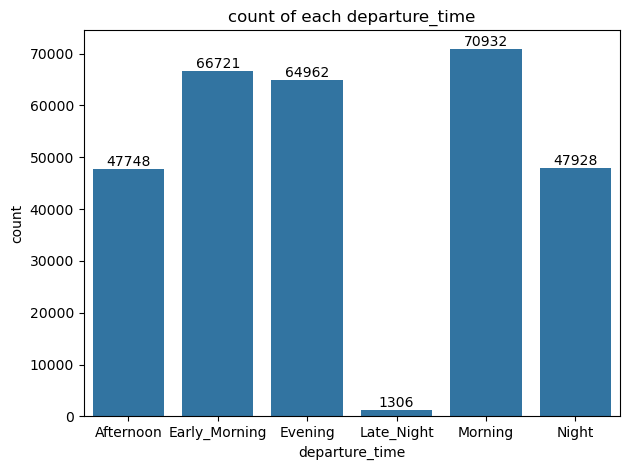

In [ ]:
ax = sns.barplot(x='departure_time', y='count', data=price_vs_departure_time)
plt.title('count of each departure_time')
ax.bar_label(ax.containers[0])
plt.tight_layout()
plt.show()

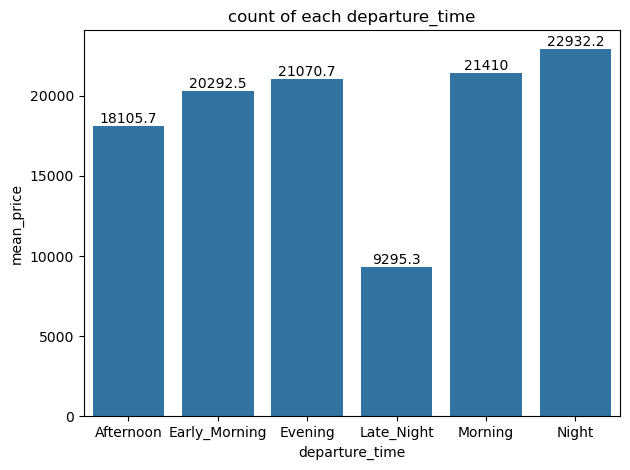

In [ ]:
ax = sns.barplot(x='departure_time', y='mean_price', data=price_vs_departure_time)
plt.title('count of each departure_time')
ax.bar_label(ax.containers[0])
plt.tight_layout()
plt.show()

**1. Booking Late Night flights offers the best cost savings due to lower prices, despite lower availability**

**2. while Morning and Night flights are pricier and more frequent, reflecting higher demand**

# 3.4 Price Vs Arrival Time

In [ ]:
price_vs_arrival_time = pd.pivot_table(data, index='arrival_time', values='price', 
                        aggfunc=['mean','count']).round(2)
price_vs_arrival_time = pd.DataFrame(price_vs_arrival_time)
price_vs_arrival_time.reset_index(inplace=True) 
price_vs_arrival_time.columns = ['arrival_time', 'mean_price','count'] 
price_vs_arrival_time.head(10)  

,arrival_time,mean_price,count
0,Afternoon,18447.83,38116
1,Early_Morning,14926.86,15404
2,Evening,22883.89,78150
3,Late_Night,11284.91,14001
4,Morning,22095.95,62619
5,Night,21400.72,91307


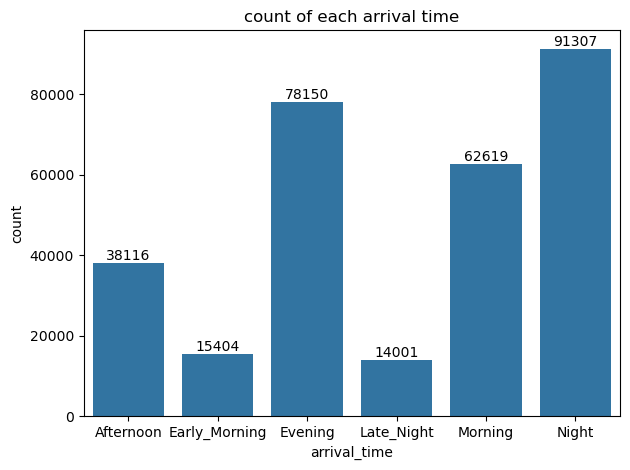

In [ ]:
ax =sns.barplot(x='arrival_time', y='count', data=price_vs_arrival_time)
plt.title('count of each arrival time')
ax.bar_label(ax.containers[0])
plt.tight_layout()
plt.show()

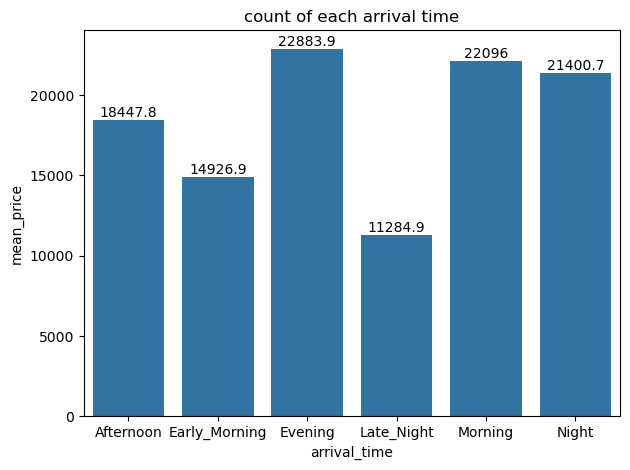

In [ ]:
ax =sns.barplot(x='arrival_time', y='mean_price', data=price_vs_arrival_time)
plt.title('count of each arrival time')
ax.bar_label(ax.containers[0])
plt.tight_layout()
plt.show()

**1. Booking Early Morning or Late Night arrivals offers cost savings due to lower prices, despite lower frequency**

**2. while Evening and Morning arrivals are pricier and more common, likely due to higher demand.**

# 3.5 Price Vs Source City

In [ ]:
price_vs_source_city = pd.pivot_table(data, index='source_city', values='price', 
                        aggfunc=['mean','count']).round(2)
price_vs_source_city = pd.DataFrame(price_vs_source_city)
price_vs_source_city.reset_index(inplace=True) 
price_vs_source_city.columns = ['source_city', 'mean_price','count'] 
price_vs_source_city.head(10)  

,source_city,mean_price,count
0,Bangalore,21411.00,52019
1,Chennai,21802.29,38599
2,Delhi,18851.43,61264
3,Hyderabad,20105.38,40778
4,Kolkata,21433.34,46149
5,Mumbai,21351.34,60788


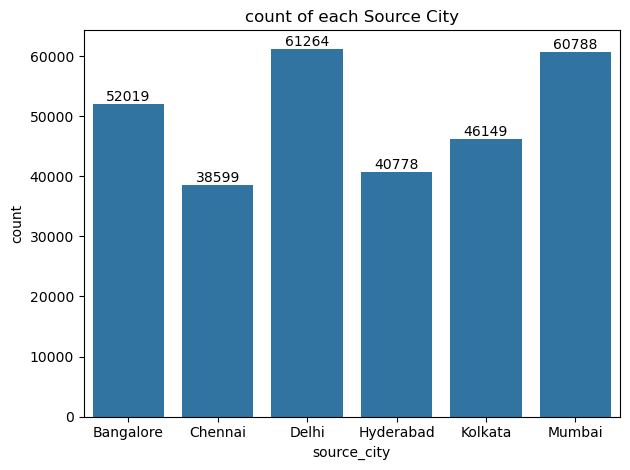

In [ ]:
ax =sns.barplot(x='source_city', y='count', data=price_vs_source_city)
plt.title('count of each Source City')
ax.bar_label(ax.containers[0])
plt.tight_layout()
plt.show()

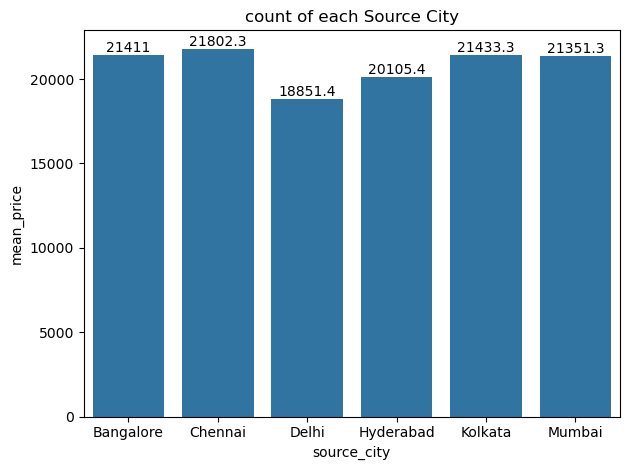

In [ ]:
ax = sns.barplot(x='source_city', y='mean_price', data=price_vs_source_city)
plt.title('count of each Source City')
ax.bar_label(ax.containers[0])
plt.tight_layout()
plt.show()

**1. Booking from Delhi offers the best cost savings due to the lowest price, so it has the highest frequency**

**2. while Chennai flights are pricier and less frequent, possibly due to demand or route specifics.**

# 3.6 Price Vs Destination City

In [ ]:
price_vs_destination_city = pd.pivot_table(data, index='destination_city', values='price', 
                        aggfunc=['mean','count']).round(2)
price_vs_destination_city = pd.DataFrame(price_vs_destination_city)
price_vs_destination_city.reset_index(inplace=True) 
price_vs_destination_city.columns = ['destination city', 'mean_price','count'] 
price_vs_destination_city.head(10)  

,destination city,mean_price,count
0,Bangalore,21464.29,50980
1,Chennai,21871.95,40324
2,Delhi,18362.24,57306
3,Hyderabad,20240.28,42616
4,Kolkata,21793.76,49422
5,Mumbai,21187.76,58949


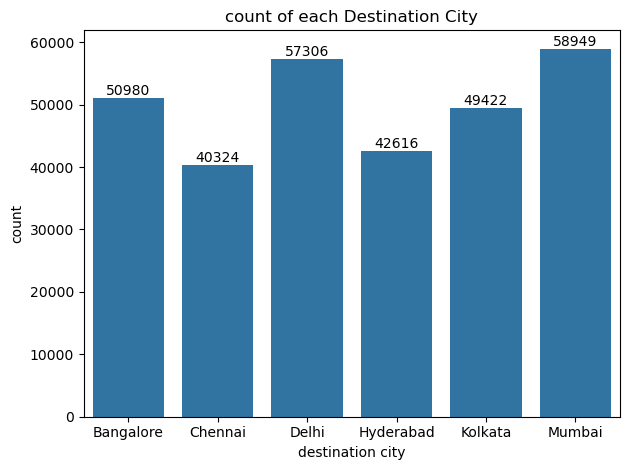

In [ ]:
ax =sns.barplot(x='destination city', y='count', data=price_vs_destination_city)
plt.title('count of each Destination City')
ax.bar_label(ax.containers[0])
plt.tight_layout()
plt.show()

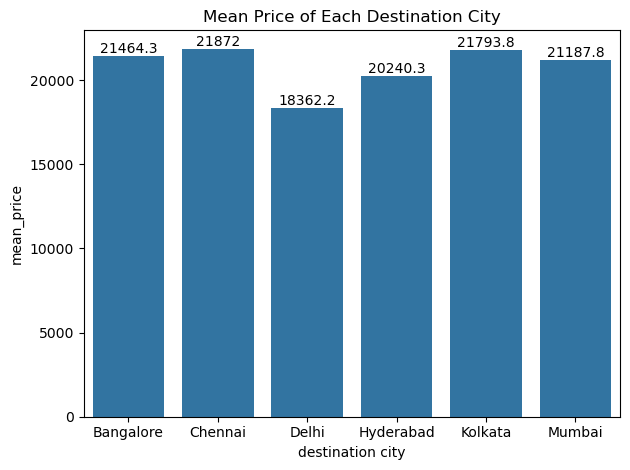

In [ ]:
ax = sns.barplot(x='destination city', y='mean_price', data=price_vs_destination_city)
plt.title('Mean Price of Each Destination City')
ax.bar_label(ax.containers[0])
plt.tight_layout()
plt.show()

**1. delhi has the lowest mean price and the hughest volume of flights between all destination city**

**2. Mumbai has the highest number of flights and also has one of the highest mean prices in all destination city**

# 3.7 Prices Vs Stops Frequencies

In [ ]:
price_vs_Stops = pd.pivot_table(data, index='stops', values='price', 
                        aggfunc=['mean','count']).round(2)
price_vs_Stops = pd.DataFrame(price_vs_Stops)
price_vs_Stops.reset_index(inplace=True) 
price_vs_Stops.columns = ['stops', 'mean_price','count'] 
price_vs_Stops.head(10)  

,stops,mean_price,count
0,one,22759.18,250370
1,two_or_more,13714.14,13223
2,zero,9375.94,36004


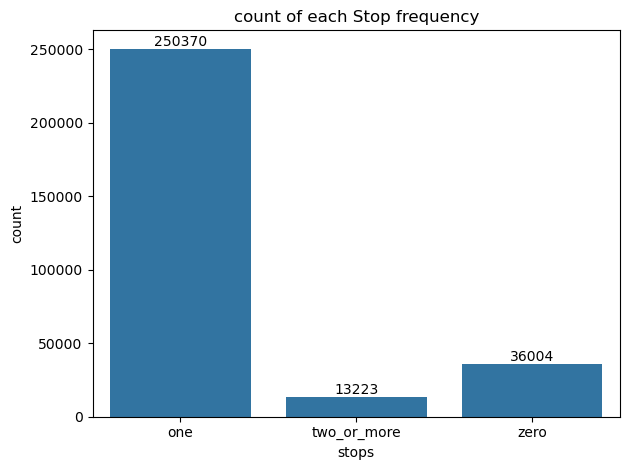

In [ ]:
ax =sns.barplot(x='stops', y='count', data=price_vs_Stops)
plt.title('count of each Stop frequency')
ax.bar_label(ax.containers[0])
plt.tight_layout()
plt.show()

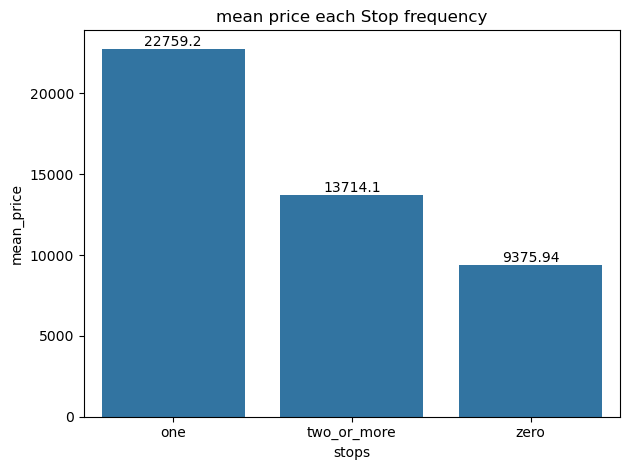

In [ ]:
ax = sns.barplot(x='stops', y='mean_price', data=price_vs_Stops)
plt.title('mean price each Stop frequency')
ax.bar_label(ax.containers[0])
plt.tight_layout()
plt.show()

**1- one stop trips has the highest count and mean price between all the stops category** 

# 3.8 Prices Vs Days left to flight

In [ ]:
price_vs_Stops = pd.pivot_table(data, index='days_left', values='price', 
                        aggfunc=['mean']).round(2)
price_vs_Stops = pd.DataFrame(price_vs_Stops)
price_vs_Stops.reset_index(inplace=True) 
price_vs_Stops.columns = ['days_left', 'mean_price'] 
price_vs_Stops.head(10)  

,days_left,mean_price
0,1,20830.42
1,2,29317.59
2,3,27746.10
3,4,25518.44
4,5,25832.99
5,6,24589.07
6,7,25256.33
7,8,24784.40
8,9,25583.21
9,10,25290.61


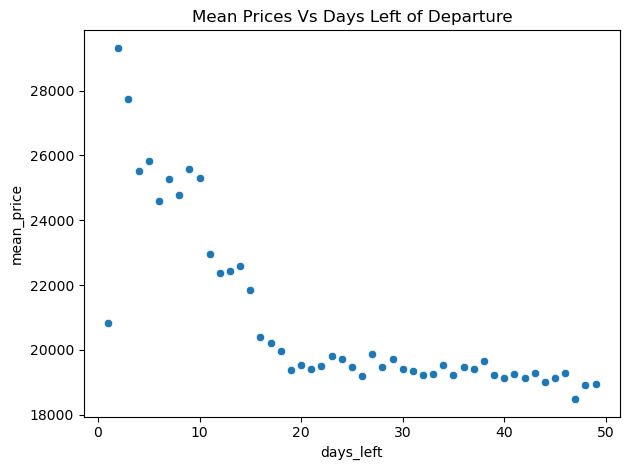

In [ ]:
sns.scatterplot(price_vs_Stops,x='days_left',y='mean_price')
plt.title("Mean Prices Vs Days Left of Departure")
plt.tight_layout()
plt.show()

**1. Booking 1 day before departure offers the best cost savings, while 2 days is the priciest, possibly due to last-minute demand spikes.**

**2. The optimal time to book for cost savings is 20–40 days before departure, where prices are lowest.**

# 3.9 Prices Vs Duration of Flight

In [ ]:
price_vs_Duration = pd.pivot_table(data, index='duration', values='price', 
                        aggfunc=['mean']).round(2)
price_vs_Duration = pd.DataFrame(price_vs_Duration)
price_vs_Duration.reset_index(inplace=True) 
price_vs_Duration.columns = ['Duration', 'mean_price'] 
price_vs_Duration.head(100)  

,Duration,mean_price
0,0.83,1973.56
1,0.92,2003.54
2,1.00,2266.06
3,1.08,2589.31
4,1.17,2632.21
...,...,...
95,8.58,20602.83
96,8.67,15592.83
97,8.75,17402.93
98,8.83,18700.47


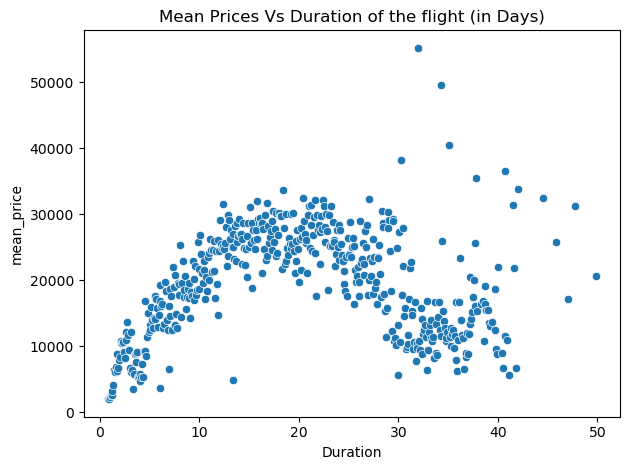

In [ ]:
sns.scatterplot(price_vs_Duration,x='Duration',y='mean_price')
plt.title("Mean Prices Vs Duration of the flight (in Days)")
plt.tight_layout()
plt.show()

**Booking the shortest flights (e.g., 0.83–1.00 hours) offers the best cost savings, while flights of 4+ hours are pricier, likely due to longer distances or added services.**

# 3.10 Count & Mean Prices For Each Class per Each Airline

In [ ]:
price_vs_class_per_airline = pd.pivot_table(data, index='class', values='price', columns='airline',
                        aggfunc=['mean','count']).round(2).replace({np.nan:0})
price_vs_class_per_airline = pd.DataFrame(price_vs_class_per_airline)
price_vs_class_per_airline.reset_index(inplace=True)
price_vs_class_per_airline.head(10)

class     mean                                                 \
airline            AirAsia Air_India GO_FIRST   Indigo SpiceJet   Vistara   
0        Business     0.00  47129.71     0.00     0.00     0.00  55109.15   
1         Economy  4091.07   7313.68  5652.01  5324.22  6179.28   7806.94   

           count                                                
airline  AirAsia Air_India GO_FIRST   Indigo SpiceJet  Vistara  
0            0.0   32897.0      0.0      0.0      0.0  60034.0  
1        16098.0   47994.0  23173.0  43120.0   9011.0  67270.0

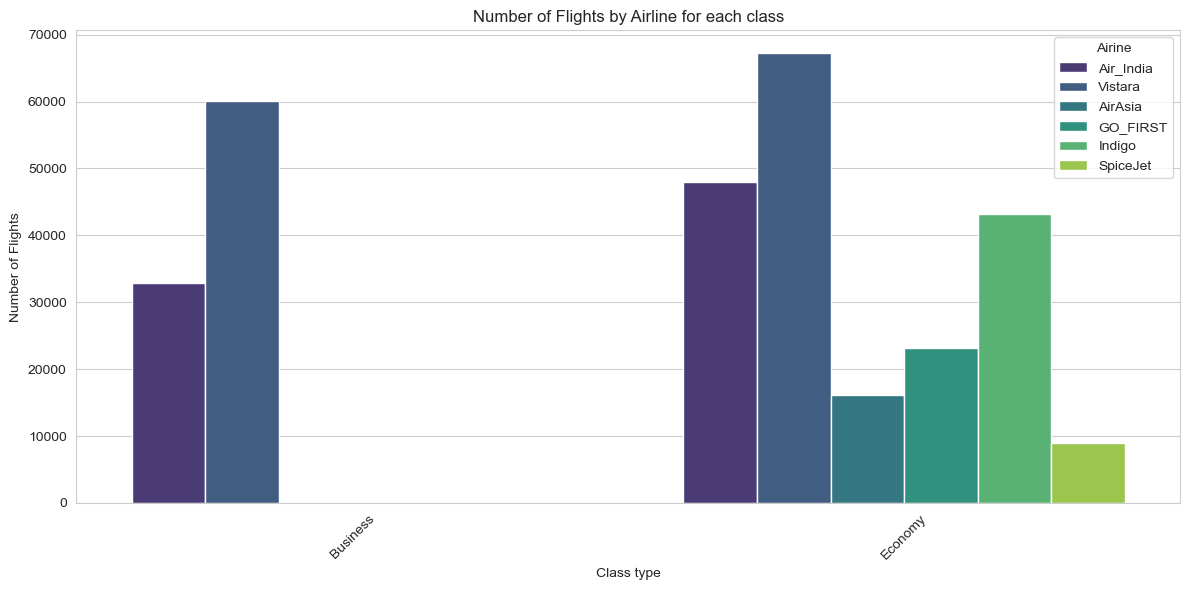

In [ ]:
sns.set_style("whitegrid")

grouped_data = data['price'].groupby([data['class'], data['airline']]).count().reset_index()

plt.figure(figsize=(12, 6))
ax = sns.barplot(x='class', y='price', hue='airline', data=grouped_data, palette='viridis')
plt.title('Number of Flights by Airline for each class')
plt.xlabel('Class type')
plt.ylabel('Number of Flights')
plt.xticks(rotation=45)
plt.legend(title='Airine')
plt.tight_layout()
plt.show()

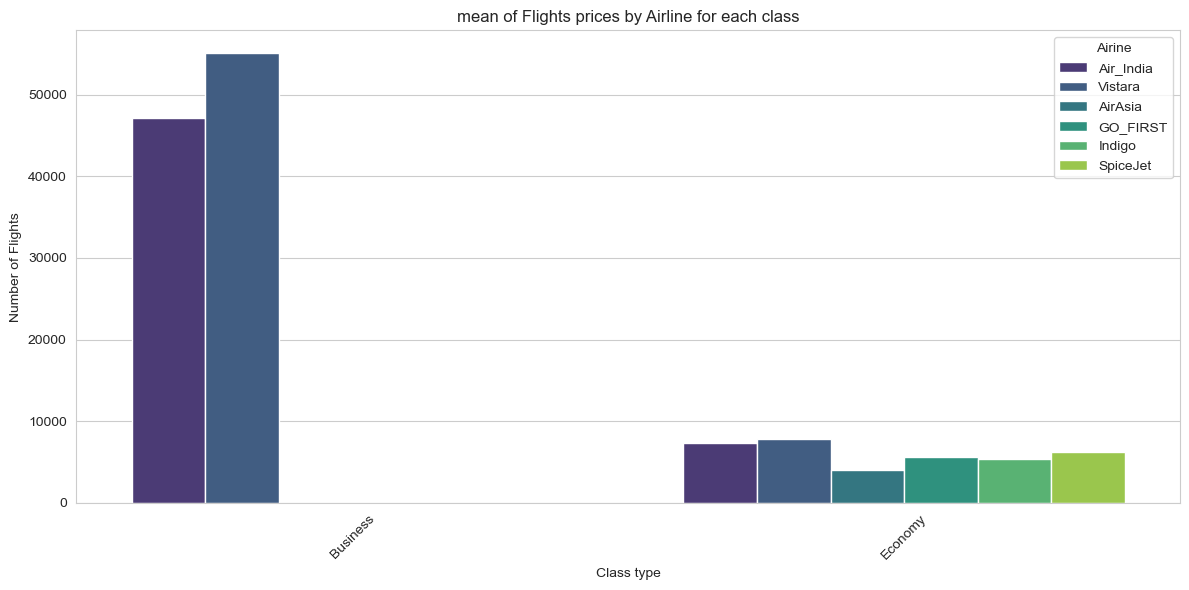

In [ ]:
sns.set_style("whitegrid")

grouped_data = data['price'].groupby([data['class'], data['airline']]).mean().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x='class', y='price', hue='airline', data=grouped_data, palette='viridis')
plt.title('mean of Flights prices by Airline for each class')
plt.xlabel('Class type')
plt.ylabel('Number of Flights')
plt.xticks(rotation=45)
plt.legend(title='Airine')
plt.tight_layout()
plt.show()

**1. Booking Economy with AirAsia or Indigo offers the best cost savings, while Business class with Vistara or Air India is expensive but rare, reflecting premium demand.**

**2. Booking Economy with AirAsia or Indigo offers the best cost savings, while Vistara Business is the priciest option, reflecting its premium service.**

# 4- machine learning algorithms

# Random Forest Regressor model

# 4.1 Model Preprocessing

In [ ]:
encoded_df = data.copy()
label_encoder = LabelEncoder()

encoded_df['airline'] = label_encoder.fit_transform(encoded_df['airline'])
encoded_df['source_city'] = label_encoder.fit_transform(encoded_df['source_city'])
encoded_df['departure_time'] = label_encoder.fit_transform(encoded_df['departure_time'])
encoded_df['arrival_time'] = label_encoder.fit_transform(encoded_df['arrival_time'])
encoded_df['destination_city'] = label_encoder.fit_transform(encoded_df['destination_city'])
encoded_df['stops'] = label_encoder.fit_transform(encoded_df['stops'])
encoded_df['class'] = label_encoder.fit_transform(encoded_df['class'])
encoded_df.head()

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,4,2,2,2,5,5,1,2.17,1,5953
1,4,2,1,2,4,5,1,2.33,1,5953
2,0,2,1,2,1,5,1,2.17,1,5956
3,5,2,4,2,0,5,1,2.25,1,5955
4,5,2,4,2,4,5,1,2.33,1,5955


In [ ]:
target_variable = encoded_df.columns.to_list().pop(-1)
Features_variables = encoded_df.columns.to_list()
Features_variables.pop(-1)

print(target_variable)
print(Features_variables)

price
['airline', 'source_city', 'departure_time', 'stops', 'arrival_time', 'destination_city', 'class', 'duration', 'days_left']


# 4.2 Random Forest Model Training and Testing

In [ ]:
def train_rf_model(data, target_variable, n_estimators):

    results = {}
    
    X = encoded_df.drop(target_variable, axis=1)  
    y = encoded_df[target_variable] 

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state=42)

    RF = RandomForestRegressor(n_estimators=n_estimators,max_depth=20,n_jobs=-1)

    RF.fit(X_train, y_train)

    y_pred = RF.predict(X_test)

    mse = mean_squared_error(y_test, y_pred).__round__(3)
    r2 = r2_score(y_test, y_pred).__round__(3)
    rmse = root_mean_squared_error(y_test, y_pred).__round__(3)
    mae = mean_absolute_error(y_test, y_pred).__round__(3)

    return RF, {'MSE': mse,'R2': r2,'RMSE':rmse,"MAE":mae} 

estimators_list = [50, 100, 200]

results = {}

for n in estimators_list:
    
    model, metric = train_rf_model(encoded_df, 'price', n)
    results[f"{n} trees"] = metric
    
results = pd.DataFrame(results)
results.head()

,50 trees,100 trees,200 trees
MSE,6868213.514,6848715.465,6786130.014
R2,0.986,0.986,0.987
RMSE,2620.728,2617.005,2605.020
MAE,1176.726,1176.542,1170.676


**changeing estimation of number of tress in the Random Forest leads to lower numbers**

**R-squared (R2) - Coefficient of Determination: has measures the proportion of variance in the Price variable that is predictable from the other variables.**

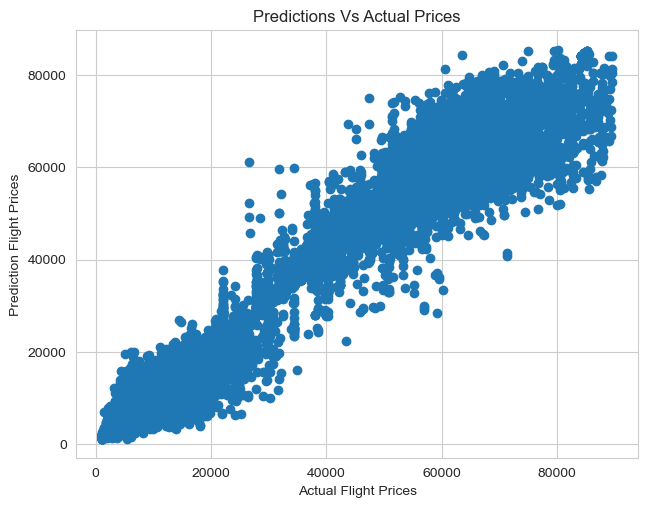

In [ ]:
X = encoded_df.drop(target_variable, axis=1)  
y = encoded_df[target_variable] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state=42)

RF = RandomForestRegressor(n_estimators=200,max_depth=20,n_jobs=-1)

RF.fit(X_train, y_train)

y_pred = RF.predict(X_test)


plt.scatter(y_test, y_pred)
plt.tight_layout()
plt.xlabel("Actual Flight Prices")
plt.ylabel("Prediction Flight Prices")
plt.title("Predictions Vs Actual Prices")
plt.show()

# 4.3 Model Feature Importance 

In [ ]:
feature_importances = model.feature_importances_

feature_names = encoded_df.drop('price', axis=1).columns

importance = pd.Series(feature_importances, index=feature_names)

sorted_importance = importance.sort_values(ascending=False)
importance = pd.DataFrame(sorted_importance)
importance.reset_index(inplace=True) 
importance.columns = ['Features', 'Importance'] 
importance.head(10)

,Features,Importance
0,class,0.887876
1,duration,0.056772
2,days_left,0.015845
3,airline,0.010286
4,source_city,0.010025
5,destination_city,0.009803
6,arrival_time,0.004020
7,departure_time,0.003871
8,stops,0.001502


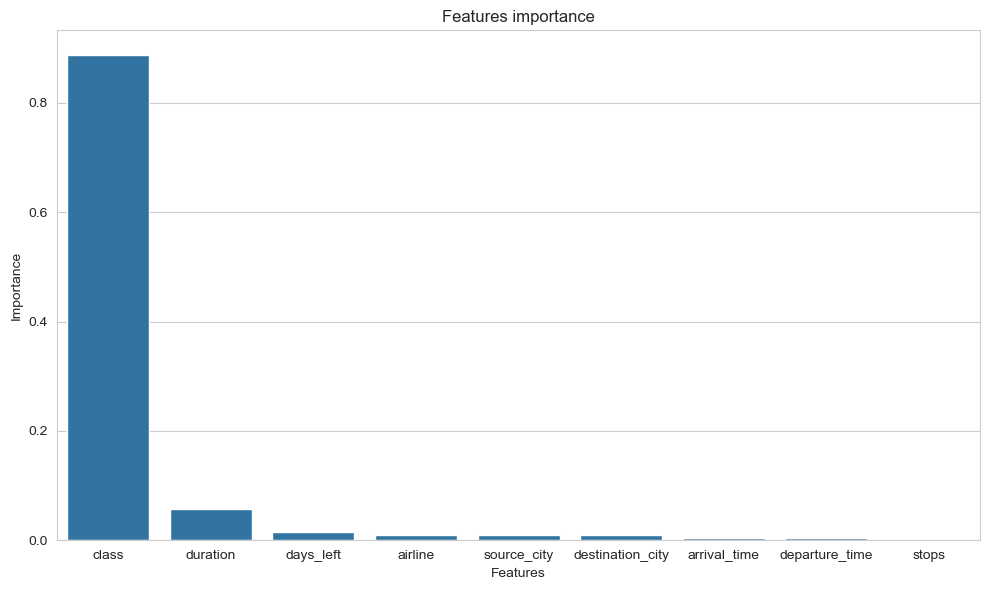

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Features', y='Importance', data=importance)
plt.title('Features importance')
plt.tight_layout()
plt.show()